# Components, Cliques, Communities

## Instructional Video

Please watch the following video before annotating readings:

<iframe width="560" height="315" src="https://www.youtube.com/embed/jdkKWQT-zDs?si=m-5XCJVffAl2RPGr" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture; web-share" allowfullscreen></iframe>

## Readings

- Scott, J. (2017). Social network analysis (4th edition) (Ch. 7). SAGE Publications.
- Yassine, S., Kadry, S., & Sicilia, M.-A. (2022). Detecting communities using social network analysis in online learning environments: Systematic literature review. WIREs Data Mining and Knowledge Discovery, 12(1), e1431. https://doi.org/10.1002/widm.1431

## Demo

In this quick demo, we will use the Kite graph, add a few extra nodes and edges, and then try to examine components, cliques, and other sub-structures in the network. 

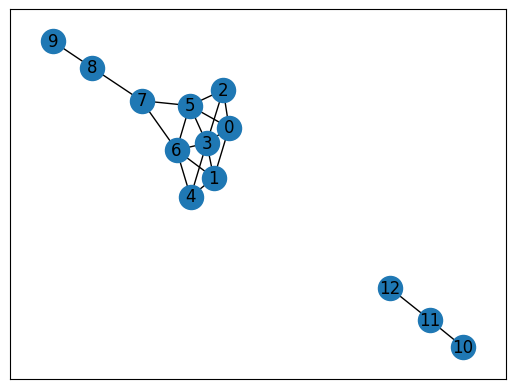

In [1]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt

G = nx.krackhardt_kite_graph()

G.add_nodes_from([10, 11, 12])
G.add_edge(10, 11)
G.add_edge(12, 11)

nx.draw_networkx(G)

### Components

In [2]:
# How many connected components does G have? 
nx.number_connected_components(G)

2

In [3]:
# What are these components?
comps = nx.connected_components(G)

# Check the size of each component
[len(c) for c in sorted(comps, key=len, reverse=True)]

[10, 3]

10
3


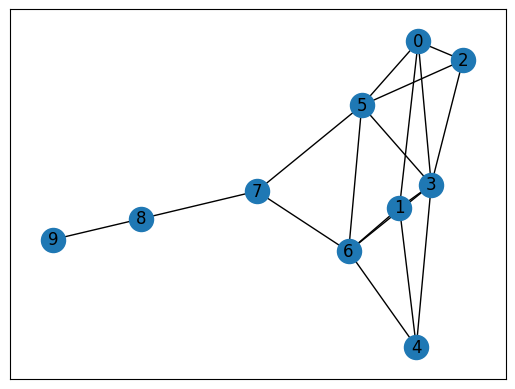

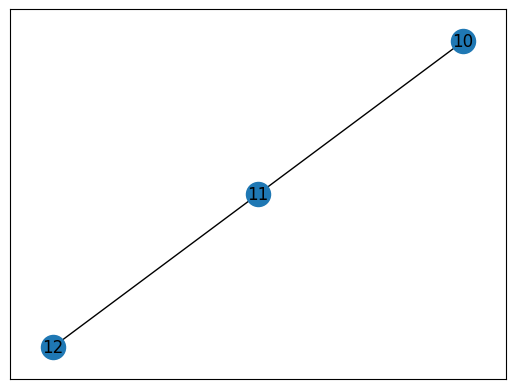

In [4]:
# Convert these components to graph objects
comps_graphs = [G.subgraph(c).copy() for c in nx.connected_components(G)]

# Plot these components separently
for index,g in enumerate(comps_graphs):
    plt.figure(index)
    print(len(g))
    nx.draw_networkx(g)
plt.show()

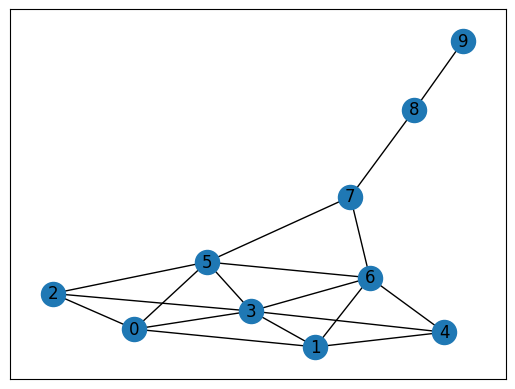

In [5]:
# Find the largest component
largest_cc = max(nx.connected_components(G), key=len)

# Visualize the largest component
nx.draw_networkx(G.subgraph(largest_cc).copy())

### Cliques

In [6]:
cliques = nx.find_cliques(G)

sum(1 for c in cliques)  # The number of maximal cliques in G

9

In [7]:
max(nx.find_cliques(G), key=len)  # The largest maximal clique in G

[3, 0, 2, 5]

3
4
4
3
3


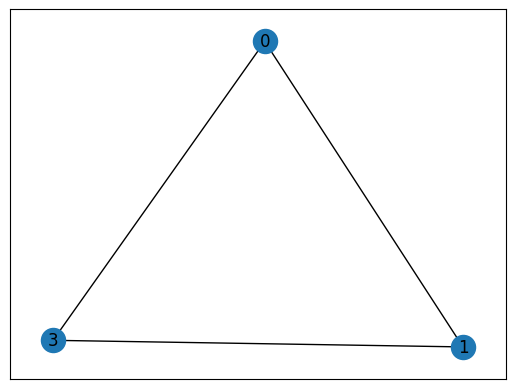

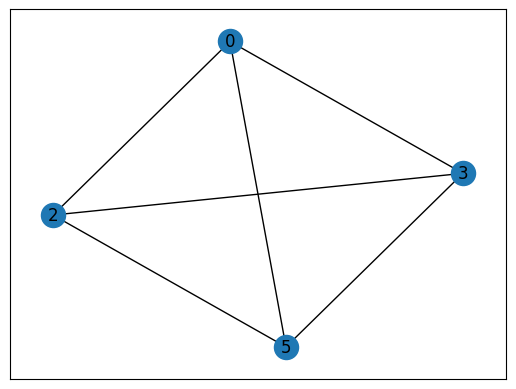

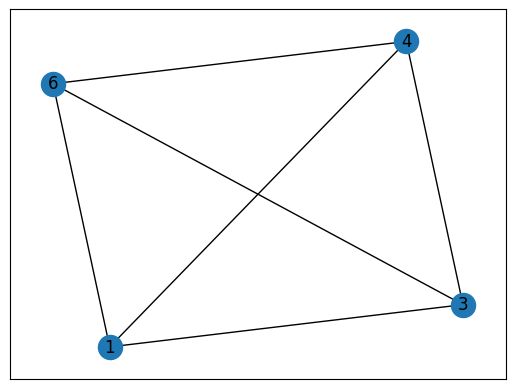

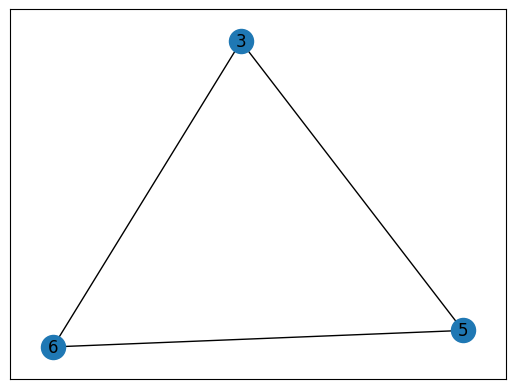

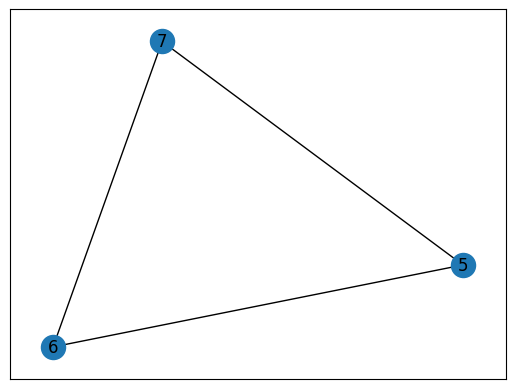

In [8]:
# Convert these cliques to graph objects
clique_graphs = [G.subgraph(c).copy() for c in nx.find_cliques(G)]

# Plot these cliques separently
for index,g in enumerate(clique_graphs):
    if len(g) > 2: # only keep 
        print(len(g))
        plt.figure(index)
        nx.draw_networkx(g)
plt.show()

In [9]:
# Find the maximal cliques in G that contain a given node: #3
[c for c in nx.find_cliques(G) if 3 in c]

[[3, 0, 1], [3, 0, 2, 5], [3, 4, 1, 6], [3, 6, 5]]

### Community Detection

#### Using Girvan-Newman community detection algorithm

See details in the [reference page](https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.community.centrality.girvan_newman.html#networkx.algorithms.community.centrality.girvan_newman).

[({0, 1, 2, 3, 4, 5, 6, 7}, {8, 9}, {10, 11, 12}), ({0, 1, 2, 3, 4, 5, 6}, {7}, {8, 9}, {10, 11, 12}), ({0, 2, 5}, {1, 3, 4, 6}, {7}, {8, 9}, {10, 11, 12}), ({0, 2, 5}, {1, 3, 4, 6}, {7}, {8, 9}, {10}, {11, 12}), ({0}, {1, 3, 4, 6}, {2, 5}, {7}, {8, 9}, {10}, {11, 12}), ({0}, {1}, {2, 5}, {3, 4, 6}, {7}, {8, 9}, {10}, {11, 12}), ({0}, {1}, {2}, {3, 4, 6}, {5}, {7}, {8, 9}, {10}, {11, 12}), ({0}, {1}, {2}, {3}, {4, 6}, {5}, {7}, {8, 9}, {10}, {11, 12}), ({0}, {1}, {2}, {3}, {4}, {5}, {6}, {7}, {8, 9}, {10}, {11, 12}), ({0}, {1}, {2}, {3}, {4}, {5}, {6}, {7}, {8}, {9}, {10}, {11, 12}), ({0}, {1}, {2}, {3}, {4}, {5}, {6}, {7}, {8}, {9}, {10}, {11}, {12})]


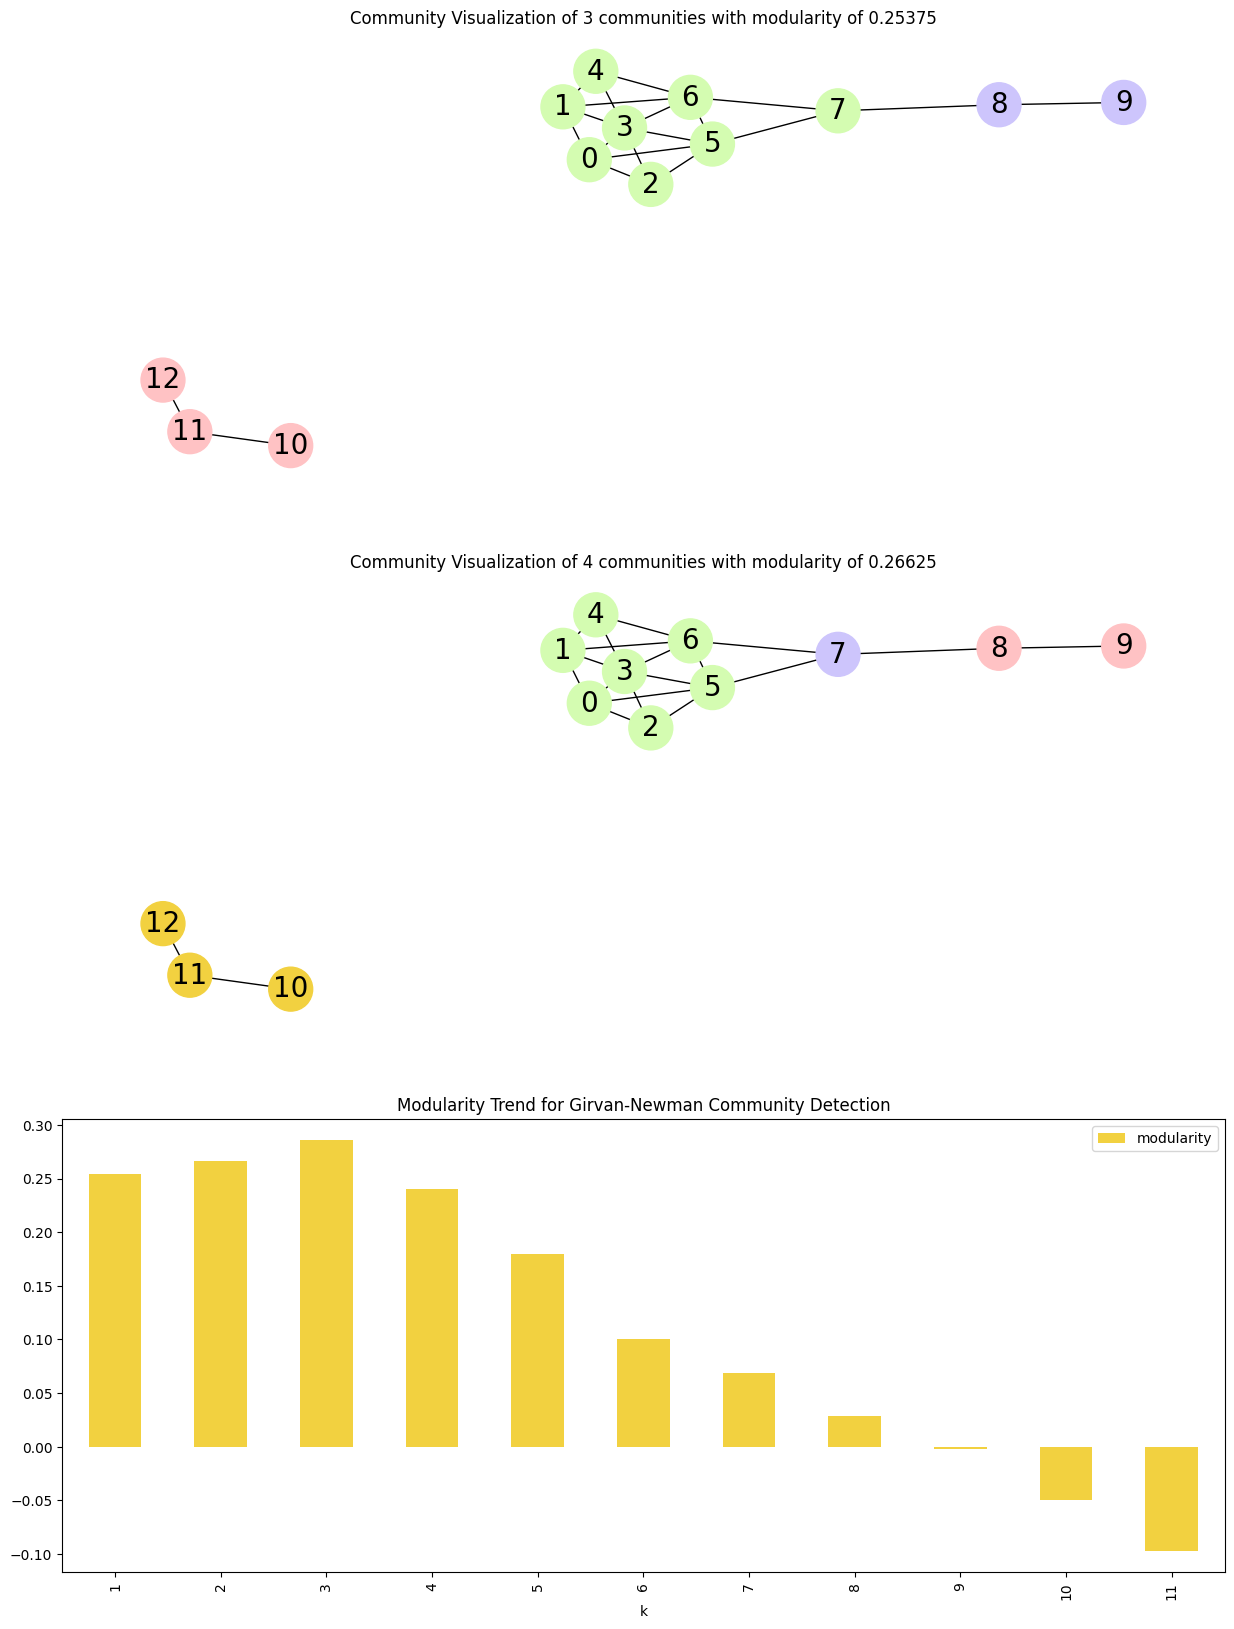

In [10]:
# Community Detection using Girvan-Newman
# See https://networkx.org/documentation/stable/auto_examples/algorithms/plot_girvan_newman.html
communities = list(nx.community.girvan_newman(G))

# Check community detection solutions
print(communities)

# Modularity -> measures the strength of division of a network into modules
modularity_df = pd.DataFrame(
    [
        [k + 1, nx.community.modularity(G, communities[k])]
        for k in range(len(communities))
    ],
    columns=["k", "modularity"],
)

# function to create node colour list
def create_community_node_colors(graph, communities):
    number_of_colors = len(communities[0])
    colors = ["#D4FCB1", "#CDC5FC", "#FFC2C4", "#F2D140", "#BCC6C8"][:number_of_colors]
    node_colors = []
    for node in graph:
        current_community_index = 0
        for community in communities:
            if node in community:
                node_colors.append(colors[current_community_index])
                break
            current_community_index += 1
    return node_colors


# function to plot graph with node colouring based on communities
def visualize_communities(graph, communities, i):
    node_colors = create_community_node_colors(graph, communities)
    modularity = round(nx.community.modularity(graph, communities), 6)
    title = f"Community Visualization of {len(communities)} communities with modularity of {modularity}"
    pos = nx.spring_layout(graph, k=0.3, iterations=50, seed=2)
    plt.subplot(3, 1, i)
    plt.title(title)
    nx.draw(
        graph,
        pos=pos,
        node_size=1000,
        node_color=node_colors,
        with_labels=True,
        font_size=20,
        font_color="black",
    )


fig, ax = plt.subplots(3, figsize=(15, 20))

# Plot graph with colouring based on communities
visualize_communities(G, communities[0], 1)
visualize_communities(G, communities[1], 2)

# Plot change in modularity as the important edges are removed
modularity_df.plot.bar(
    x="k",
    ax=ax[2],
    color="#F2D140",
    title="Modularity Trend for Girvan-Newman Community Detection",
)
plt.show()

#### Using Louvain community detection algorithm

This algorithm will return "the best partition" of a network. Louvain Community Detection Algorithm is a simple method to extract the community structure of a network. This is a heuristic method based on modularity optimization.

See [reference page](https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.community.louvain.louvain_communities.html).

In [11]:
communities = nx.community.louvain_communities(G, seed=123)

In [12]:
communities

[{0, 2, 3, 5}, {1, 4, 6}, {7, 8, 9}, {10, 11, 12}]

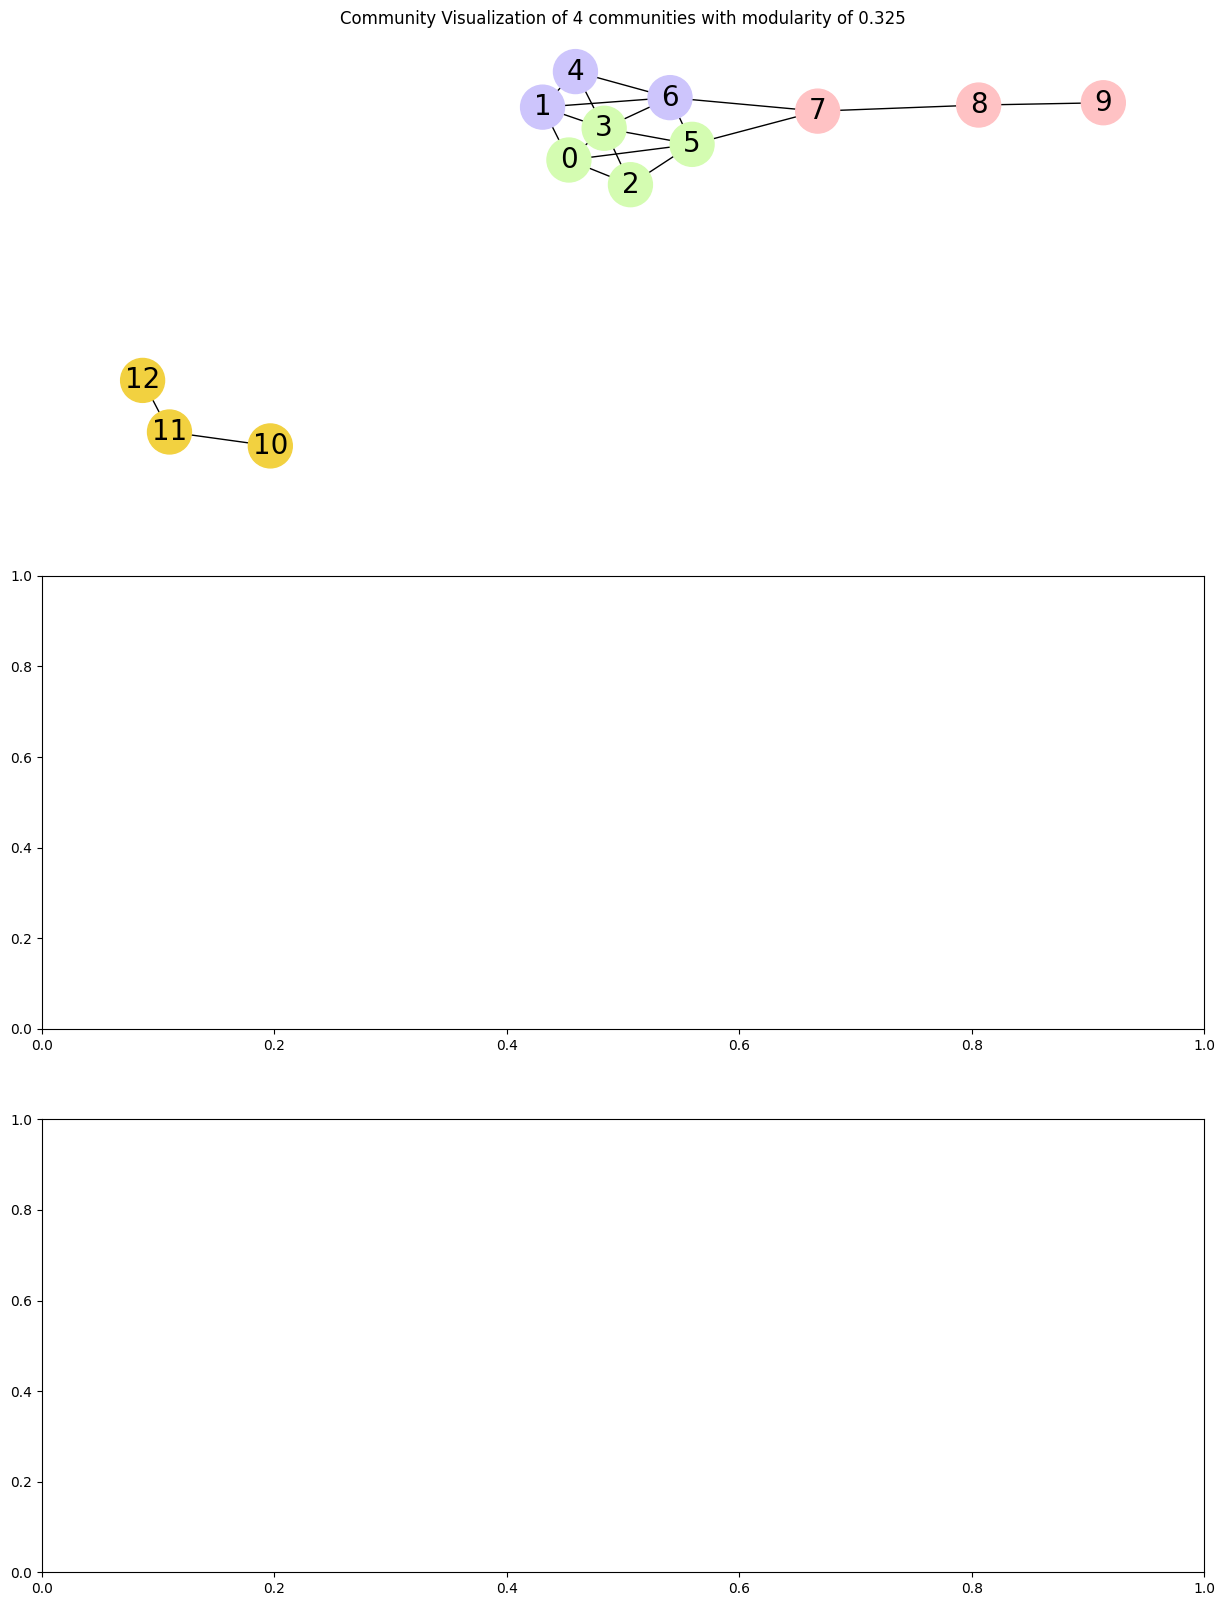

In [13]:
fig, ax = plt.subplots(3, figsize=(15, 20))
visualize_communities(G, communities, 1)